# Image generation using GAN models

In [1]:
# Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

## Image generated by a simple GAN model

A simple GAN generator model trained on MNIST dataset takes a random noise vector of size 100 and generates an 28x28 grayscale fake image of a digit. The generated digit resembles to any of the actual training digits between 0 to 9.

In [2]:
# Define Generator model
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, g_output_dim)
    
    # forward method
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        return torch.tanh(self.fc4(x)) 

In [3]:
# Load model parameters from saved checkpoint
def load_model(model, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        print(f"Loading checkpoint from {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint)
        print("Checkpoint loaded successfully")
    else:
        print(f"No checkpoint found at {checkpoint_path}")

In [4]:
# Define model and optimizer
g_input_dim = 100  # Example input dimension
g_output_dim = 784  # Example output dimension (e.g., for MNIST)
generator = Generator(g_input_dim, g_output_dim)
optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

# Load model from checkpoint
checkpoint_path = '../saved_models/gan_mnist_pytorch/gan_mnist_pytorch_G_epoch_200.pth'
load_model(generator, checkpoint_path)

Loading checkpoint from ../saved_models/gan_mnist_pytorch/gan_mnist_pytorch_G_epoch_200.pth
Checkpoint loaded successfully


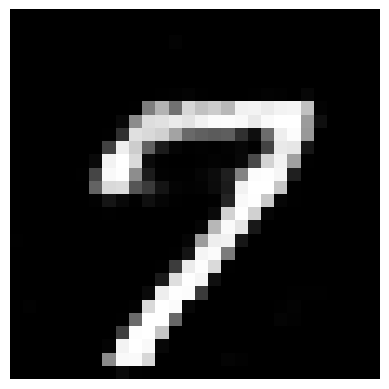

In [5]:
# Create a random noise vector z
g_input_dim = 100  # Example input dimension
z = torch.randn(1, g_input_dim)
# Generate an image using the generator
generated_image = generator(z)

# Reshape the generated image to 28x28 for visualization
generated_image = generated_image.view(generated_image.size(0), 1, 28, 28)
# Display the generated image
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(generated_image[0, 0].detach().numpy(), cmap='gray')
plt.axis('off')
plt.show()